### 문제 
1. csv 폴더 안에 있는 'Sales Records.csv' 로드 
2. 'Order ID', 'Total Revenue', 'Total Cost', 'Total Profit', 'Sales Channel' 컬럼을 삭제
3. 컬럼의 이름을 변경 -> ['대륙', '국가', '상품종류', '우선순위', '주문일자', '발송일자', '개수', '단가', '원가']
4. 대륙과 국가를 기준으로 오름차순 정렬
5. 기존의 인덱스는 제거하고 인덱스를 재지정
6. 파생변수(새로운 컬럼)을 생성
    - 총단가 = 개수 * 단가
    - 총원가 = 개수 * 원가
    - 총이윤 = 총단가 - 총원가

In [ ]:
import pandas as pd

In [ ]:
# 외부의 파일을 로드 
sales = pd.read_csv('../csv/Sales Records.csv')
sales.head()

In [ ]:
# 특정 컬럼을 제거 
sales.drop(
    ['Order ID', 'Total Revenue', 'Total Cost', 'Total Profit', 'Sales Channel'], 
    axis=1,
    inplace=True
    )

In [ ]:
sales.head()

In [ ]:
sales.columns = ['대륙', '국가', '상품종류', '우선순위', '주문일자', '발송일자', '개수', '단가', '원가']

In [ ]:
sales.head(1)

In [ ]:
# 대륙과 국가로 오름차순 정렬 
sales.sort_values(['대륙', '국가'], inplace=True)
# sales.sort_values('국가', inplace=True)
sales.head()

In [ ]:
# 기존의 인덱스를 제거 하고 인덱스를 재지정
sales.reset_index(drop=True, inplace=True)

In [ ]:
sales['단가'] * sales['개수']

In [ ]:
# 파생변수를 생성 (총원가, 총단가, 총이윤)
sales['총단가'] = sales['개수'] * sales['단가']
sales['총원가'] = sales['개수'] * sales['원가']
sales['총이윤'] = sales['총단가'] - sales['총원가']

In [ ]:
sales.head(3)

In [ ]:
# 컬럼의 순서를 변경
sales = sales.iloc[:, [0,1,4,2,3,5,6,7,8,9,10,11]]

In [ ]:
sales.head()

In [ ]:
# 대륙을 기준으로 그룹화 -> 그룹화 연산 합계
# 대륙 중 총 이윤의 합계가 가장 높은 대륙은 어디인가?
group_data = sales[['총이윤', '대륙']].groupby('대륙').sum()

In [ ]:
group_data.sort_values('총이윤', ascending=False)

In [ ]:
group_data.loc['Asia']

In [ ]:
# 국가별 총이윤의 합계
# 어느 국가가 가장 많이 버는가? -> 상위 top10만 출력
# South Korea는 몇위인가?
group_data2 = sales[['국가', '총이윤']].groupby('국가').sum()

In [ ]:
group_data2 = group_data2.sort_values('총이윤', ascending=False)

In [ ]:
# 상위 top10을 확인
group_data2.head(10)

In [ ]:
# South Korea의 랭킹을 확인 

# case1 (반복문을 이용 while문)
group_data2.index[0] == 'South Korea'

i = 0

while i < len(group_data2):
    if group_data2.index[i] == 'South Korea':
        # print(i)
        break
    i += 1

print(i+1)

In [ ]:
# case2 (for문)
# korea_rank 초기값을 지정
korea_rank = 1
for i in group_data2.index:
    # i에 들어가는 데이터들을? -> 국가명
    # print(i)
    if i == 'South Korea':
        break
    korea_rank += 1
korea_rank


In [ ]:
# case3 (reset_index를 이용)
case3 = group_data2.reset_index()

In [ ]:
# 국가가 South Korea인 데이터만 필터
flag = case3['국가'] == 'South Korea'

In [ ]:
case3.loc[flag].index[0] + 1

In [ ]:
# case4 (rank 파생변수를 생성)
group_data2['rank'] = range(1, len(group_data2) + 1, 1)

In [ ]:
group_data2.head(5)

In [ ]:
group_data2.loc['South Korea']

In [ ]:
# case5 (list에 있는 내장함수)
# 위치를 출력하는 함수 -> 문자열데이터에서 특정 문자의 위치를 나타내는 함수 (find(), index())
# list에서는 특정 위치를 출력하는 함수 index()
list(group_data2.index).index('South Korea') + 1

In [ ]:
# 상위 10개의 국가를 그래프 표시 
import matplotlib.pyplot as plt

In [ ]:
data = group_data2.head(10)

In [ ]:
x = data.index
y = data['총이윤']

plt.bar(x, y)
plt.show()

In [ ]:
# 그래프의 크기를 변경
plt.figure(figsize=(14,8))
plt.bar(x, y)
plt.show()

In [ ]:
# x, y를 반전 
plt.barh(x, y)
plt.show()

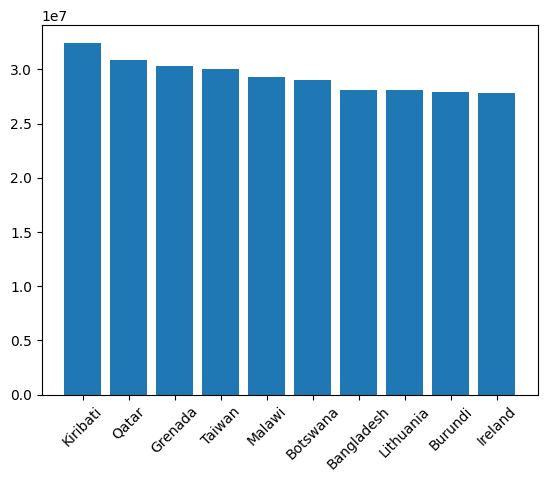

In [80]:
# x축 데이터들을 회전 
plt.bar(x, y)
plt.xticks(rotation=45)
plt.show()